# load packages and data

In [2]:
%reset -f

import pandas            as pd
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns
import numpy             as np

from scipy.stats                            import t
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from datetime                               import datetime
from statsmodels.tsa.stattools              import adfuller
from statsmodels.tsa.arima.model            import ARIMA

# set up seaborn parameters for plotting

In [3]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

# load data into Python

In [4]:
df = pd.read_excel('ausunemp.xlsx')

In [5]:
df.head()

,Month,Unemployment rate (percentage; source: ABS)
0,1990-01-01,6.7
1,1990-02-01,7.1
2,1990-03-01,6.5
3,1990-04-01,6.3
4,1990-05-01,6.5


# set time index

In [6]:
df['date'] = pd.to_datetime(df['Month'])
df = df.set_index('date')
df.drop(['Month'], axis=1, inplace=True)
df.head()

,Unemployment rate (percentage; source: ABS)
date,
1990-01-01,6.7
1990-02-01,7.1
1990-03-01,6.5
1990-04-01,6.3
1990-05-01,6.5


In [7]:
df.tail(1)

,Unemployment rate (percentage; source: ABS)
date,
2019-07-01,5.2


# I rename the variable as 'Y'

In [8]:
df = df.rename(columns={"Unemployment rate (percentage; source: ABS)": "Y"})

In [9]:
df.tail(6)

,Y
date,
2019-02-01,5.4
2019-03-01,5.4
2019-04-01,5.3
2019-05-01,5.1
2019-06-01,5.1
2019-07-01,5.2


# line plot of $Y_t$

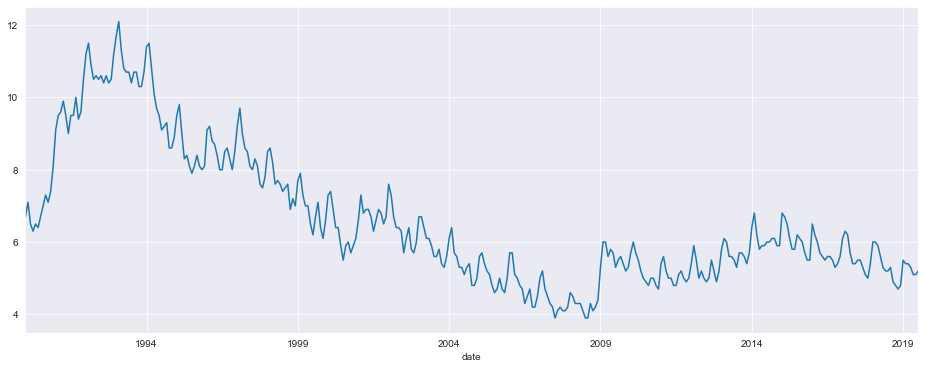

In [10]:
df['Y'].plot()
plt.show()

# compute and plot ma $\mathrm{MA}_t$ (aka centered moving average in pandas, python and machine learning framework)

In [11]:
df['MA'] = df['Y'].rolling(window=12, center=True).mean()
df['MA'].head(20)

date
1990-01-01         NaN
1990-02-01         NaN
1990-03-01         NaN
1990-04-01         NaN
1990-05-01         NaN
1990-06-01         NaN
1990-07-01    6.925000
1990-08-01    7.125000
1990-09-01    7.325000
1990-10-01    7.583333
1990-11-01    7.883333
1990-12-01    8.133333
1991-01-01    8.350000
1991-02-01    8.583333
1991-03-01    8.791667
1991-04-01    9.016667
1991-05-01    9.208333
1991-06-01    9.391667
1991-07-01    9.591667
1991-08-01    9.766667
Name: MA, dtype: float64

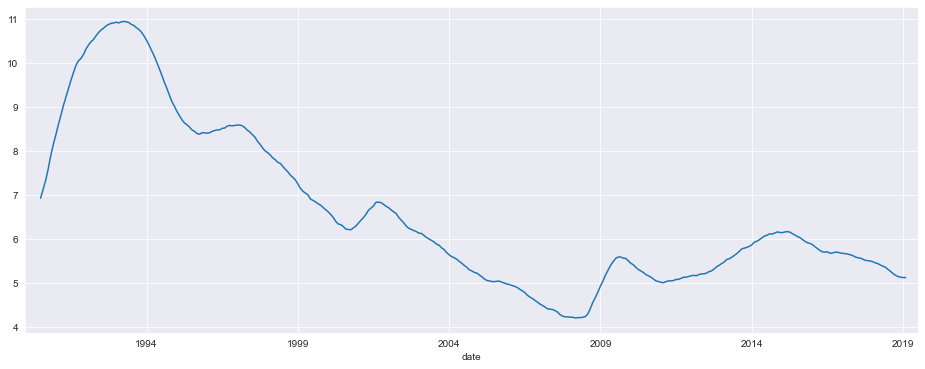

In [12]:
df['MA'].plot()
plt.show()

# compute and plot centralized ma $\mathrm{CMA}_t$ (aka centralized centered moving average in pandas, python and machine learning framework)

In [13]:
df['CMA'] = df['MA'].rolling(window=2).mean().shift(-1)
df['CMA'].head(20)

date
1990-01-01         NaN
1990-02-01         NaN
1990-03-01         NaN
1990-04-01         NaN
1990-05-01         NaN
1990-06-01         NaN
1990-07-01    7.025000
1990-08-01    7.225000
1990-09-01    7.454167
1990-10-01    7.733333
1990-11-01    8.008333
1990-12-01    8.241667
1991-01-01    8.466667
1991-02-01    8.687500
1991-03-01    8.904167
1991-04-01    9.112500
1991-05-01    9.300000
1991-06-01    9.491667
1991-07-01    9.679167
1991-08-01    9.850000
Name: CMA, dtype: float64

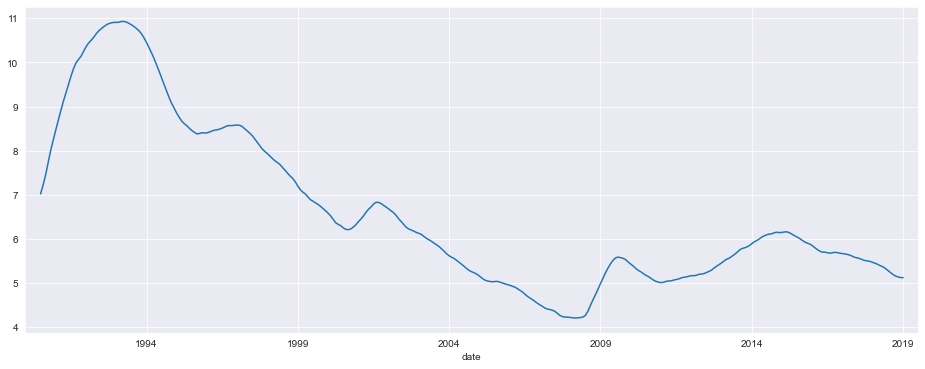

In [14]:
df['CMA'].plot()
plt.show()

# compute and plot $\frac{Y_t}{\mathrm{CMA}_t}$

In [15]:
df['Y_over_CMA'] = df['Y']/df['CMA']
df['Y_over_CMA'].head(20)

date
1990-01-01         NaN
1990-02-01         NaN
1990-03-01         NaN
1990-04-01         NaN
1990-05-01         NaN
1990-06-01         NaN
1990-07-01    0.953737
1990-08-01    0.968858
1990-09-01    0.979318
1990-10-01    0.918103
1990-11-01    0.924037
1990-12-01    0.982811
1991-01-01    1.074803
1991-02-01    1.093525
1991-03-01    1.078147
1991-04-01    1.086420
1991-05-01    1.021505
1991-06-01    0.948200
1991-07-01    0.981489
1991-08-01    0.964467
Name: Y_over_CMA, dtype: float64

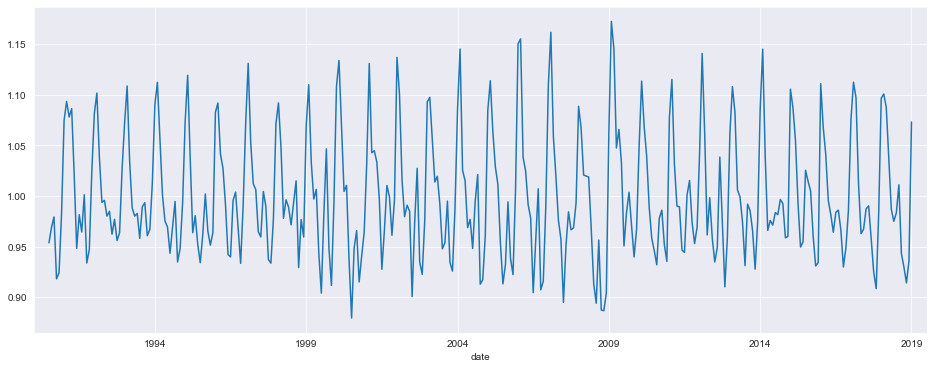

In [16]:
df['Y_over_CMA'].plot()
plt.show()

# adding 60 more period for prediction
## note that you can only add it here, not before nor afterwareds; otherwise you will end up with errors

In [17]:
L = 59 #how many zeros
i = 0
while i<=L:
    i += 1
    last_date = df.index[-1] + pd.DateOffset(months=1)
    df.loc[last_date] = np.nan
    
df.tail(60)

,Y,MA,CMA,Y_over_CMA
date,,,,
2019-08-01,NaN,NaN,NaN,NaN
2019-09-01,NaN,NaN,NaN,NaN
2019-10-01,NaN,NaN,NaN,NaN
2019-11-01,NaN,NaN,NaN,NaN
2019-12-01,NaN,NaN,NaN,NaN
2020-01-01,NaN,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN
2020-03-01,NaN,NaN,NaN,NaN
2020-04-01,NaN,NaN,NaN,NaN


# construct month dummies

In [18]:
names = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

for i, x in enumerate(names):
    df[x] = (df.index.get_level_values(0).month == i+1).astype(int)

df.head()

,Y,MA,CMA,Y_over_CMA,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
date,,,,,,,,,,,,,,,,
1990-01-01,6.7,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0
1990-02-01,7.1,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0
1990-03-01,6.5,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0
1990-04-01,6.3,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0
1990-05-01,6.5,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0


# regress $\frac{Y_t}{\mathrm{CMA}_t}$ with month dummies

In [19]:
model = sm.OLS(df['Y_over_CMA'], df[['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']],missing = 'drop')
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Y_over_CMA   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     135.0
Date:                Tue, 21 Sep 2021   Prob (F-statistic):          3.77e-115
Time:                        18:22:52   Log-Likelihood:                 769.83
No. Observations:                 343   AIC:                            -1516.
Df Residuals:                     331   BIC:                            -1470.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
m1             1.0835      0.005    223.489      0.0

# compute $\overline{SN}_t$ based on the previous regression

In [20]:
df['snbar'] = results.predict(df[['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']])
df['snbar'].head(20)

date
1990-01-01    1.083478
1990-02-01    1.115468
1990-03-01    1.054478
1990-04-01    1.008868
1990-05-01    0.995486
1990-06-01    0.968487
1990-07-01    0.945879
1990-08-01    0.972493
1990-09-01    0.995027
1990-10-01    0.946789
1990-11-01    0.936576
1990-12-01    0.976200
1991-01-01    1.083478
1991-02-01    1.115468
1991-03-01    1.054478
1991-04-01    1.008868
1991-05-01    0.995486
1991-06-01    0.968487
1991-07-01    0.945879
1991-08-01    0.972493
Name: snbar, dtype: float64

In [21]:
df['snbar'].tail(20)

date
2022-12-01    0.976200
2023-01-01    1.083478
2023-02-01    1.115468
2023-03-01    1.054478
2023-04-01    1.008868
2023-05-01    0.995486
2023-06-01    0.968487
2023-07-01    0.945879
2023-08-01    0.972493
2023-09-01    0.995027
2023-10-01    0.946789
2023-11-01    0.936576
2023-12-01    0.976200
2024-01-01    1.083478
2024-02-01    1.115468
2024-03-01    1.054478
2024-04-01    1.008868
2024-05-01    0.995486
2024-06-01    0.968487
2024-07-01    0.945879
Name: snbar, dtype: float64

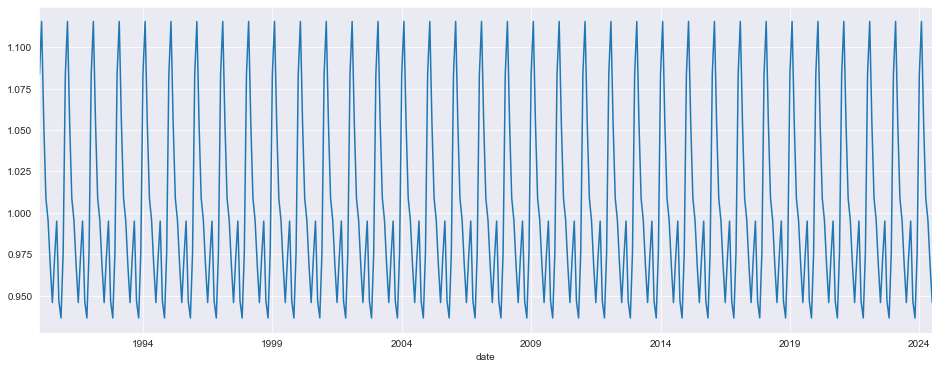

In [22]:
df['snbar'].plot()
plt.show()

# careful: the regression trick that we used during the lecture to find the mean of the snbar doesn't work here, because there are more Januaries-Julies than Augusts-Decembers in this data set. we can fix that by only regressing over the first year (or any year, really... or any period that includes equally many observations for each month) 

In [23]:
df1 = df.head(12)
df1.head(12)

,Y,MA,CMA,Y_over_CMA,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,snbar
date,,,,,,,,,,,,,,,,,
1990-01-01,6.7,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,1.083478
1990-02-01,7.1,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,1.115468
1990-03-01,6.5,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1.054478
1990-04-01,6.3,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,1.008868
1990-05-01,6.5,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0.995486
1990-06-01,6.4,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0.968487
1990-07-01,6.7,6.925000,7.025000,0.953737,0,0,0,0,0,0,1,0,0,0,0,0,0.945879
1990-08-01,7.0,7.125000,7.225000,0.968858,0,0,0,0,0,0,0,1,0,0,0,0,0.972493
1990-09-01,7.3,7.325000,7.454167,0.979318,0,0,0,0,0,0,0,0,1,0,0,0,0.995027


# regressing all $\overline{SN}_t$ with constant only is equivalent to compute the mean of $\overline{SN}_t$, both of which give you the same result. Hence, I replace the regression with a simple mean computataion to save computation load.

In [24]:
df1['snbar'].mean()

0.9999358564198793

In [25]:
df['sn'] = df['snbar']/df1['snbar'].mean()
df['sn'].head(20)

date
1990-01-01    1.083548
1990-02-01    1.115540
1990-03-01    1.054545
1990-04-01    1.008933
1990-05-01    0.995550
1990-06-01    0.968549
1990-07-01    0.945940
1990-08-01    0.972555
1990-09-01    0.995091
1990-10-01    0.946850
1990-11-01    0.936636
1990-12-01    0.976263
1991-01-01    1.083548
1991-02-01    1.115540
1991-03-01    1.054545
1991-04-01    1.008933
1991-05-01    0.995550
1991-06-01    0.968549
1991-07-01    0.945940
1991-08-01    0.972555
Name: sn, dtype: float64

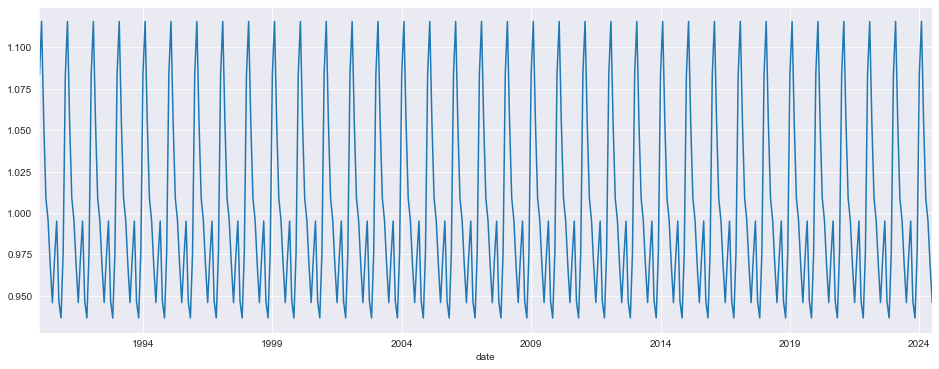

In [26]:
df['sn'].plot()
plt.show()

# compute and plot $d_t$, the deseasonalized signal

In [27]:
df['d']=df['Y']/df['sn']
df['d'].head(20)

date
1990-01-01     6.183393
1990-02-01     6.364631
1990-03-01     6.163795
1990-04-01     6.244222
1990-05-01     6.529056
1990-06-01     6.607821
1990-07-01     7.082902
1990-08-01     7.197534
1990-09-01     7.336013
1990-10-01     7.498546
1990-11-01     7.900614
1990-12-01     8.296944
1991-01-01     8.398339
1991-02-01     8.516055
1991-03-01     9.103451
1991-04-01     9.812348
1991-05-01     9.542467
1991-06-01     9.292248
1991-07-01    10.042921
1991-08-01     9.768081
Name: d, dtype: float64

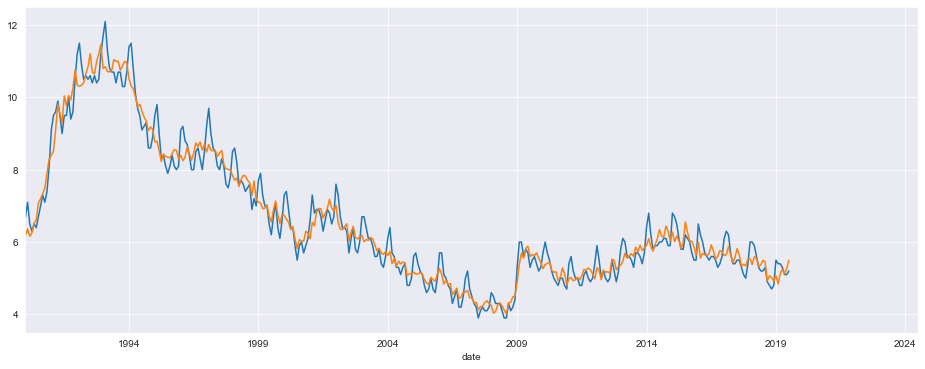

In [28]:
df['Y'].plot()
df['d'].plot()
plt.show()

# now let's detrend by regressing $d_t$ to the polynomial of t

In [29]:
df['t'] = np.arange(len(df))
df['t2'] = np.power(df['t'],2)
df['t3'] = np.power(df['t'],3)
df['t4'] = np.power(df['t'],4)

df[['t','t2','t3','t4']].head(5)

,t,t2,t3,t4
date,,,,
1990-01-01,0,0,0,0
1990-02-01,1,1,1,1
1990-03-01,2,4,8,16
1990-04-01,3,9,27,81
1990-05-01,4,16,64,256


In [30]:
X = df[['t','t2','t3','t4']]
X = sm.add_constant(X)

model1= sm.OLS(df['d'], X, missing='drop')
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      d   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     770.7
Date:                Tue, 21 Sep 2021   Prob (F-statistic):          4.73e-172
Time:                        18:22:53   Log-Likelihood:                -314.48
No. Observations:                 355   AIC:                             639.0
Df Residuals:                     350   BIC:                             658.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7027      0.154     49.948      0.0

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# compute the trend signal $\mathrm{TR}_t$

In [31]:
df['tr'] = results1.predict(X)
df['tr'].head(10)

date
1990-01-01    7.702673
1990-02-01    7.805880
1990-03-01    7.905907
1990-04-01    8.002795
1990-05-01    8.096585
1990-06-01    8.187317
1990-07-01    8.275032
1990-08-01    8.359770
1990-09-01    8.441571
1990-10-01    8.520475
Name: tr, dtype: float64

In [32]:
df['tr'].tail(10)

date
2023-10-01   -3.268153
2023-11-01   -3.520997
2023-12-01   -3.778467
2024-01-01   -4.040612
2024-02-01   -4.307481
2024-03-01   -4.579121
2024-04-01   -4.855583
2024-05-01   -5.136915
2024-06-01   -5.423168
2024-07-01   -5.714391
Name: tr, dtype: float64

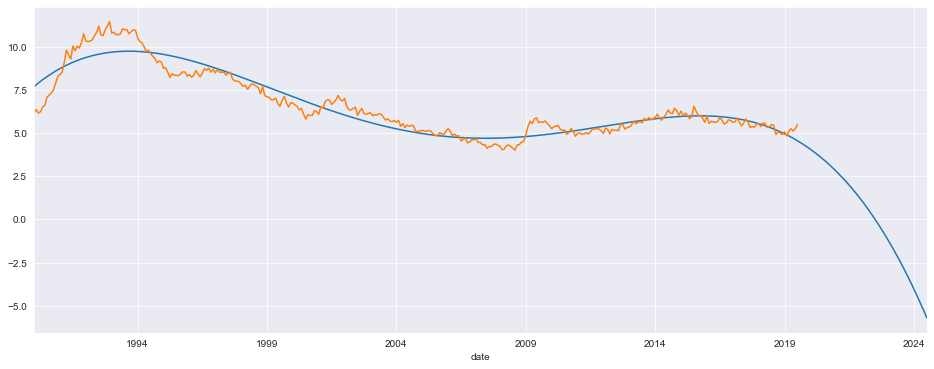

In [33]:
df['tr'].plot()
df['d'].plot()
plt.show()

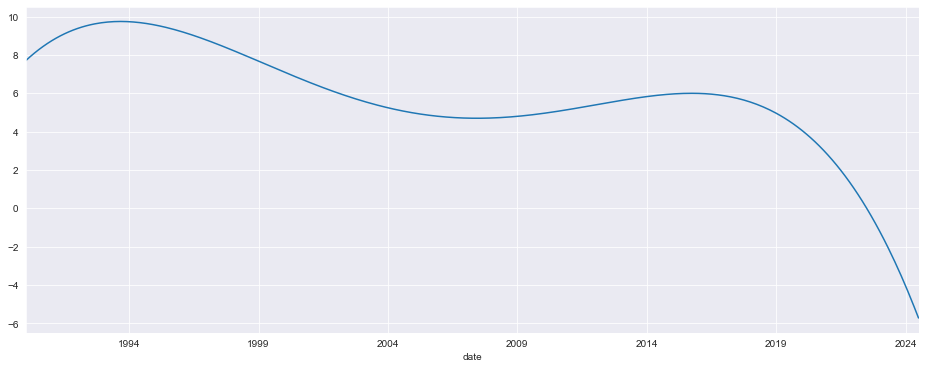

In [34]:
df['tr'].plot()
plt.show()

# compute $\mathrm{TR}_t \cdot \mathrm{SN}_t$

In [35]:
df['trsn'] = df['tr'] * df['sn']
df['trsn'].head(10)

date
1990-01-01    8.346212
1990-02-01    8.707771
1990-03-01    8.337136
1990-04-01    8.074282
1990-05-01    8.060553
1990-06-01    7.929819
1990-07-01    7.827683
1990-08-01    8.130339
1990-09-01    8.400131
1990-10-01    8.067614
Name: trsn, dtype: float64

In [36]:
df['trsn'].tail(10)

date
2023-10-01   -3.094451
2023-11-01   -3.297893
2023-12-01   -3.688778
2024-01-01   -4.378196
2024-02-01   -4.805167
2024-03-01   -4.828890
2024-04-01   -4.898957
2024-05-01   -5.114055
2024-06-01   -5.252605
2024-07-01   -5.405470
Name: trsn, dtype: float64

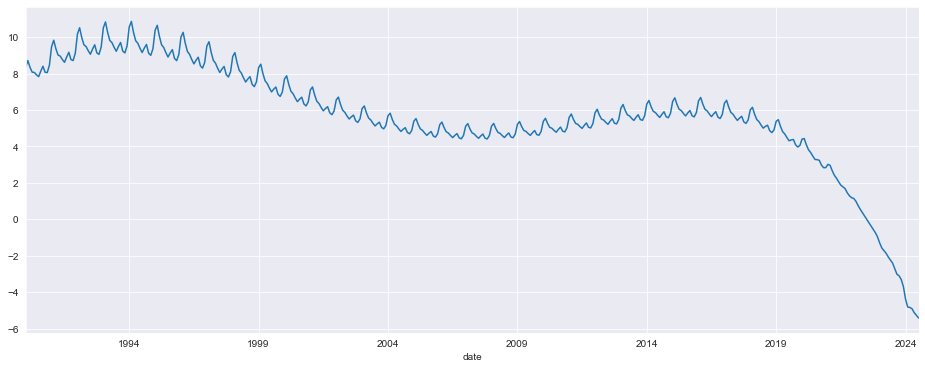

In [37]:
df['trsn'].plot()
plt.show()

# now let's construct prediction interval
* *prstd* is the prediction standard error for in-sample data
* *iv_l* and *iv_u* are the in-sample lower/upper bound for the prediction interval of $\mathrm{TR}_t$

In [38]:
prstd, iv_l, iv_u= wls_prediction_std(results1)

# However, unlike stata, statsmodel package cannot compute the prediction standard error for out-of-sample data (2019-08-01 to 2024-07-01). Hence, I have to manually compute it myself. The following computation is based on the formula in the book "Element of Statistcal Learning".

In [39]:
x_new  = X[-60:]
x_mat  = X[:355]

sigma2_est = sum(results1.resid**2) / (len(x_mat) - 5)

# Calculate the prediction SE:
y_pred_se = np.linalg.inv(np.dot(np.transpose(x_mat), x_mat))
y_pred_se = np.dot(np.dot(x_new, y_pred_se), np.transpose(x_new))
y_pred_se = np.identity(len(x_new)) + y_pred_se
y_pred_se = sigma2_est * y_pred_se
y_pred_se = np.sqrt(np.diag(y_pred_se))

# the prediction standard error for out-of-sample data (2019-08-01 to 2024-07-01).

In [40]:
y_pred_se

array([0.61212472, 0.61357199, 0.61511018, 0.61674329, 0.61847541,
       0.62031071, 0.62225344, 0.62430793, 0.62647859, 0.62876989,
       0.63118638, 0.63373265, 0.63641337, 0.63923324, 0.64219701,
       0.64530947, 0.64857545, 0.65199979, 0.65558736, 0.65934303,
       0.66327169, 0.66737823, 0.6716675 , 0.67614438, 0.68081369,
       0.68568025, 0.69074882, 0.69602413, 0.70151086, 0.70721365,
       0.71313705, 0.71928557, 0.72566365, 0.73227563, 0.73912581,
       0.74621838, 0.75355746, 0.76114706, 0.76899113, 0.77709351,
       0.78545795, 0.79408811, 0.80298755, 0.81215973, 0.82160803,
       0.83133572, 0.841346  , 0.85164195, 0.86222659, 0.87310283,
       0.88427351, 0.89574138, 0.90750912, 0.91957932, 0.9319545 ,
       0.94463713, 0.95762959, 0.97093421, 0.98455325, 0.99848893])

# combining the in-sample and out-of-sample prediction standard error, let's costruct the prediction interval for $\mathrm{TR}_t$ and the prediction interval for $\mathrm{TR}_t \cdot \mathrm{SN}_t$ using confidence level 0.95, for both in-sample and out-of-sample data

In [41]:
prstd, iv_l, iv_u= wls_prediction_std(results1)
df['se'] = np.concatenate((prstd,y_pred_se))
df['tr_lo_95'] = df['tr'] - t.ppf(0.975, 350) * df['se']
df['tr_hi_95'] = df['tr'] + t.ppf(0.975, 350) * df['se']
df['trsn_lo_95'] = df['trsn'] - t.ppf(0.975, 350) * df['se']
df['trsn_hi_95'] = df['trsn'] + t.ppf(0.975, 350) * df['se']

In [42]:
df[['se','tr_lo_95','tr_hi_95', 'trsn_lo_95','trsn_hi_95']].head(10)

,se,tr_lo_95,tr_hi_95,trsn_lo_95,trsn_hi_95
date,,,,,
1990-01-01,0.610764,6.501442,8.903903,7.144982,9.547442
1990-02-01,0.609487,6.607161,9.004598,7.509052,9.906489
1990-03-01,0.608290,6.709544,9.102270,7.140773,9.533499
1990-04-01,0.607168,6.808638,9.196952,6.880125,9.268439
1990-05-01,0.606119,6.904491,9.288678,6.868459,9.252646
1990-06-01,0.605138,6.997152,9.377482,6.739654,9.119984
1990-07-01,0.604224,7.086666,9.463398,6.639317,9.016049
1990-08-01,0.603371,7.173081,9.546459,6.943650,9.317028
1990-09-01,0.602578,7.256442,9.626700,7.215002,9.585260


In [43]:
df[['se','tr_lo_95','tr_hi_95', 'trsn_lo_95','trsn_hi_95']].tail(10)

,se,tr_lo_95,tr_hi_95,trsn_lo_95,trsn_hi_95
date,,,,,
2023-10-01,0.884274,-5.007311,-1.528994,-4.833609,-1.355293
2023-11-01,0.895741,-5.282710,-1.759284,-5.059606,-1.536180
2023-12-01,0.907509,-5.563324,-1.993610,-5.473635,-1.903921
2024-01-01,0.919579,-5.849209,-2.232016,-6.186792,-2.569599
2024-02-01,0.931955,-6.140416,-2.474545,-6.638102,-2.972231
2024-03-01,0.944637,-6.437000,-2.721242,-6.686769,-2.971011
2024-04-01,0.957630,-6.739015,-2.972151,-6.782389,-3.015524
2024-05-01,0.970934,-7.046515,-3.227316,-7.023654,-3.204455
2024-06-01,0.984553,-7.359553,-3.486783,-7.188990,-3.316220


# scatter plot deseasoned data, line plot $\mathrm{TR}_t$ and the corresponding in-sample prediction interval

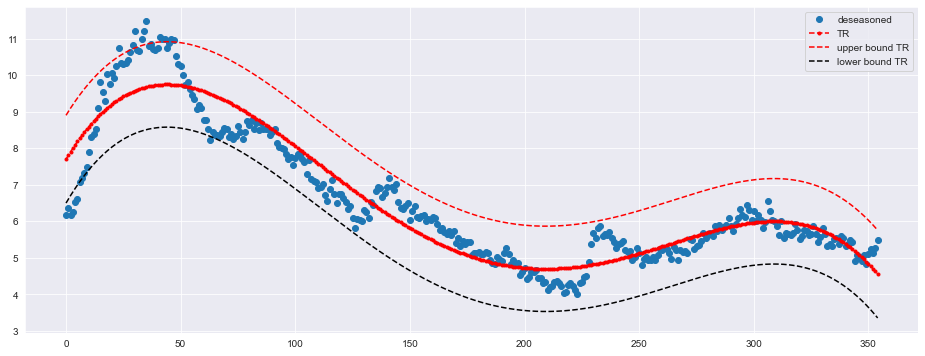

In [44]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(df['t'][:355], df['d'][:355], 'o', label="deseasoned")
ax.plot(df['t'][:355], results1.fittedvalues, 'r--.', label="TR")
ax.plot(df['t'][:355], iv_u, 'r--', label="upper bound TR")
ax.plot(df['t'][:355], iv_l, 'k--', label="lower bound TR")
ax.legend(loc='best');

# scatter plot deseasoned data, line plot $\mathrm{TR}_t$ and the corresponding in-sample/out-of-sample prediction interval for both $\mathrm{TR}_t$ and $\mathrm{TR}_t \cdot \mathrm{SN}_t $

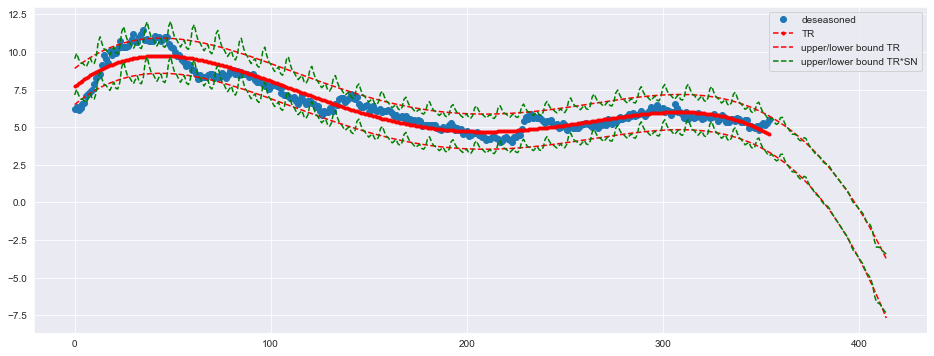

In [45]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(df['t'][:355], df['d'][:355], 'o', label="deseasoned")
ax.plot(df['t'][:355], results1.fittedvalues, 'r--.', label="TR")
ax.plot(df['t'], df['tr_hi_95'], 'r--', label="upper/lower bound TR")
ax.plot(df['t'], df['tr_lo_95'], 'r--')
ax.plot(df['t'], df['trsn_hi_95'], 'g--', label="upper/lower bound TR*SN")
ax.plot(df['t'], df['trsn_lo_95'], 'g--')
ax.legend(loc='best');

# compute cycle * irregular $\mathrm{CL}_t \cdot \mathrm{IR}_t$

In [46]:
df['clir'] = df['d'] / df['tr']
df['clir'].head(10)

date
1990-01-01    0.802759
1990-02-01    0.815364
1990-03-01    0.779644
1990-04-01    0.780255
1990-05-01    0.806396
1990-06-01    0.807080
1990-07-01    0.855937
1990-08-01    0.860973
1990-09-01    0.869034
1990-10-01    0.880062
Name: clir, dtype: float64

In [47]:
df['clir'].tail(10)

date
2023-10-01   NaN
2023-11-01   NaN
2023-12-01   NaN
2024-01-01   NaN
2024-02-01   NaN
2024-03-01   NaN
2024-04-01   NaN
2024-05-01   NaN
2024-06-01   NaN
2024-07-01   NaN
Name: clir, dtype: float64

# compute ma of $\mathrm{CL}_t \cdot \mathrm{IR}_t$ to average out $\mathrm{IR}_t$

In [48]:
df['cl']      = df['clir'].rolling(window=3, center=True).mean()
df['cl'][0]   = (2*df['clir'][0]   + df['clir'][1]  )/3
df['cl'][354] = (2*df['clir'][354] + df['clir'][353])/3
df['cl'].head(10)

/var/folders/yy/bxcs_bl16lx1phz7fzzmbl4w0000gn/T/ipykernel_47450/632225428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cl'][0]   = (2*df['clir'][0]   + df['clir'][1]  )/3
/var/folders/yy/bxcs_bl16lx1phz7fzzmbl4w0000gn/T/ipykernel_47450/632225428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cl'][354] = (2*df['clir'][354] + df['clir'][353])/3


date
1990-01-01    0.806961
1990-02-01    0.799256
1990-03-01    0.791754
1990-04-01    0.788765
1990-05-01    0.797911
1990-06-01    0.823138
1990-07-01    0.841330
1990-08-01    0.861981
1990-09-01    0.870023
1990-10-01    0.889381
Name: cl, dtype: float64

# replace nan of $\mathrm{CL}_t$ with 1

In [49]:
df['cl'].iloc[-60:] = 1
df['cl'].tail(10)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


date
2023-10-01    1.0
2023-11-01    1.0
2023-12-01    1.0
2024-01-01    1.0
2024-02-01    1.0
2024-03-01    1.0
2024-04-01    1.0
2024-05-01    1.0
2024-06-01    1.0
2024-07-01    1.0
Name: cl, dtype: float64

# plot $\mathrm{CL}_t$

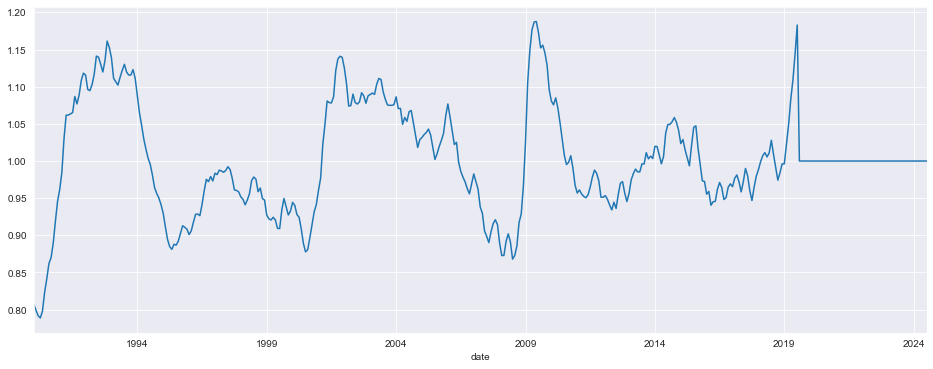

In [50]:
df['cl'].plot()
plt.show()

# compute $\mathrm{IR}_t$

In [51]:
df['ir'] =df['clir']/df['cl']
df['ir'].tail(10)

date
2023-10-01   NaN
2023-11-01   NaN
2023-12-01   NaN
2024-01-01   NaN
2024-02-01   NaN
2024-03-01   NaN
2024-04-01   NaN
2024-05-01   NaN
2024-06-01   NaN
2024-07-01   NaN
Name: ir, dtype: float64

In [52]:
df['trsncl']= df['trsn'] * df['cl']
df['trsncl'].tail(10)

date
2023-10-01   -3.094451
2023-11-01   -3.297893
2023-12-01   -3.688778
2024-01-01   -4.378196
2024-02-01   -4.805167
2024-03-01   -4.828890
2024-04-01   -4.898957
2024-05-01   -5.114055
2024-06-01   -5.252605
2024-07-01   -5.405470
Name: trsncl, dtype: float64

# plot $\mathrm{IR}_t$

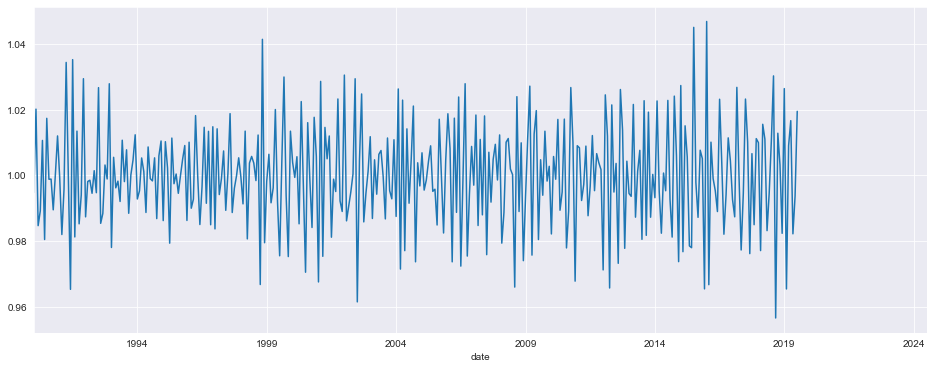

In [53]:
df['ir'].plot()
plt.show()

# Now let's plot everything together (in-sample)

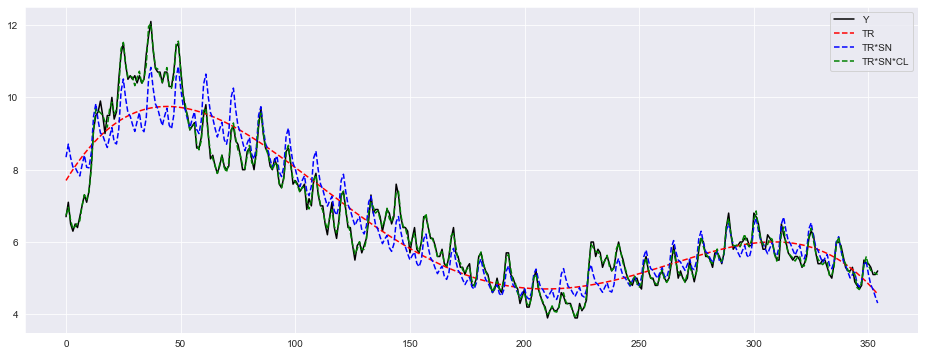

In [54]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(df['t'][:355], df['Y'][:355]     , 'k'  , label="Y")
ax.plot(df['t'][:355], df['tr'][:355]    , 'r--', label="TR")
ax.plot(df['t'][:355], df['trsn'][:355]  , 'b--', label="TR*SN")
ax.plot(df['t'][:355], df['trsncl'][:355], 'g--', label="TR*SN*CL")
ax.legend(loc='best');

plt.show()

# Now let's plot each component (in-sample)

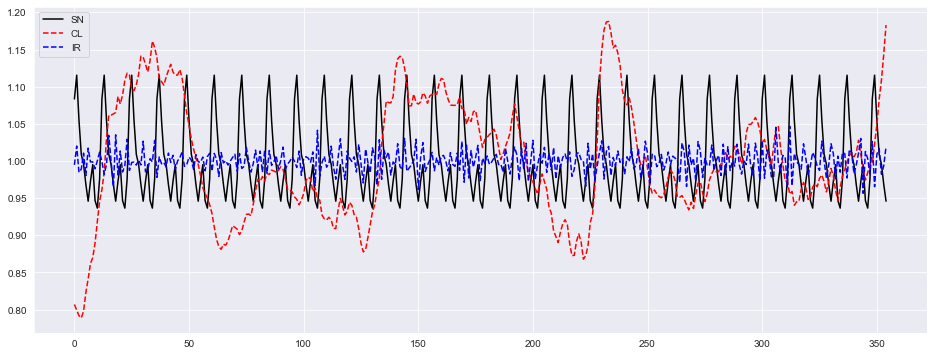

In [55]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(df['t'][:355], df['sn'][:355], 'k'  , label="SN")
ax.plot(df['t'][:355], df['cl'][:355], 'r--', label="CL")
ax.plot(df['t'][:355], df['ir'][:355], 'b--', label="IR")
ax.legend(loc='best');

plt.show()

# prediction plot (in-sample and out-of-sample)

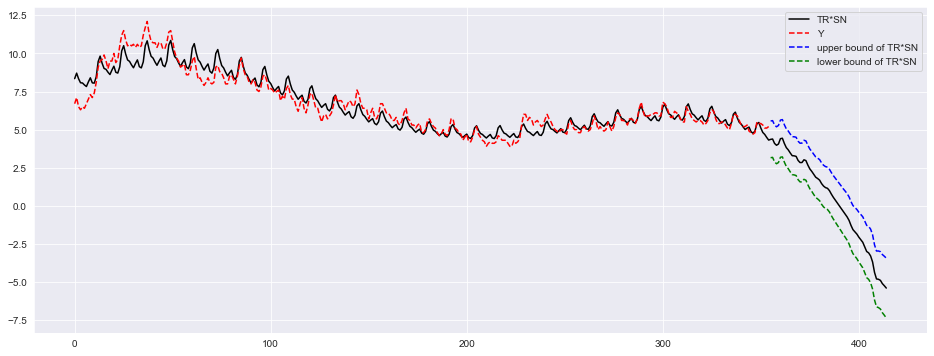

In [56]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(df['t'], df['trsn'], 'k'  , label="TR*SN")
ax.plot(df['t'], df['Y']   , 'r--', label="Y")

ax.plot(df['t'][-60:], df['trsn_hi_95'][-60:], 'b--', label="upper bound of TR*SN")
ax.plot(df['t'][-60:], df['trsn_lo_95'][-60:], 'g--', label="lower bound of TR*SN")
ax.legend(loc='best');

plt.show()


In [58]:
!rm -rf W6_Python.html
!jupyter nbconvert --to html W6_Python.ipynb

[NbConvertApp] Converting notebook W6_Python.ipynb to html
[NbConvertApp] Writing 2017395 bytes to W6_Python.html
